<a href="https://colab.research.google.com/github/YooSH-DY/machintest/blob/main/6_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

input_layer = Input(shape=(784,))
encoded = Dense(128, activation="relu")(input_layer)
decoded = Dense(784, activation="sigmoid")(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.fit(train_images, train_images,epochs=50, batch_size=256, shuffle=True, validation_data=(test_images, test_images))


Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3693 - val_loss: 0.3134
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2990 - val_loss: 0.2918
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2849 - val_loss: 0.2832
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2788 - val_loss: 0.2788
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2751 - val_loss: 0.2758
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2725 - val_loss: 0.2736
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2705 - val_loss: 0.2720
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2690 - val_loss: 0.2707
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2678 - val_loss: 0.2695
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2668 - val_loss: 0.2686

313/313 [==============================] - 0s 1ms/step


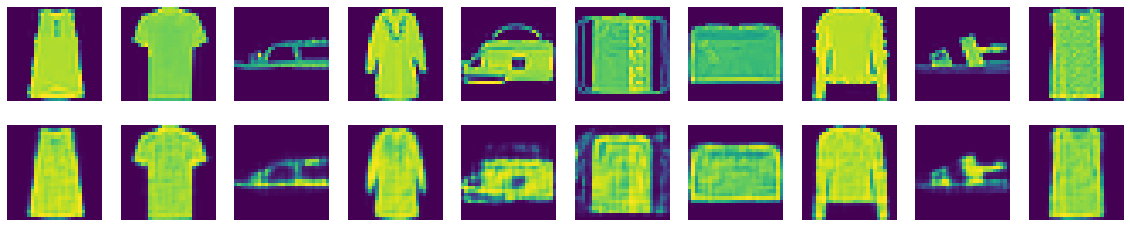

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

decoded_imgs = autoencoder.predict(test_images)

n = 10
random_imgs = np.random.randint(0, test_images.shape[0], n)

fig, ax = plt.subplots(2, n, figsize=(20, 4))

for i, img_idx in enumerate(random_imgs):
    ax[0, i].imshow(test_images[img_idx].reshape(28, 28))
    ax[0, i].axis("off")
    
    ax[1, i].imshow(decoded_imgs[img_idx].reshape(28, 28))
    ax[1, i].axis("off")

plt.show()
